# Project 5

In [33]:
import pandas as pd
data = pd.read_csv("model1.csv", header=None)
data.style.set_properties(**{'background-color': 'pink',
                           'color': 'red'})

In [50]:

result = []

for i in range(len(data.iloc[:,0])):
    result.append(1-float(data.iloc[i,0].split("+")[0]))
result

[7.771561172376096e-15,
 5.662137425588298e-15,
 5.88418203051333e-15,
 7.993605777301127e-15]

In [57]:
df = pd.DataFrame(result)

0
0  7.771561e-15
1  5.662137e-15
2  5.884182e-15
3  7.993606e-15

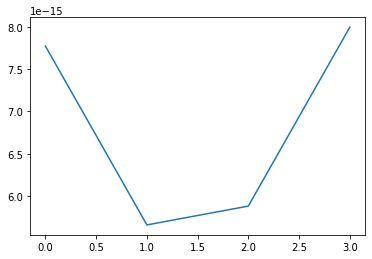

In [60]:
import matplotlib.pyplot as plt

plt.plot(df[0])

In [4]:
import pandas as pd
data = pd.read_csv("model2.csv", header=None)
data.style.set_properties(**{'background-color': 'pink',
                           'color': 'red'})

In [5]:

result = []

for i in range(len(data.iloc[:,0])):
    result.append(1-float(data.iloc[i,0].split("+0.000000")[0]))
df = pd.DataFrame(result)

In [8]:
# Drop outliers

df = df.drop(49)
df = df.drop(320)

/opt/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


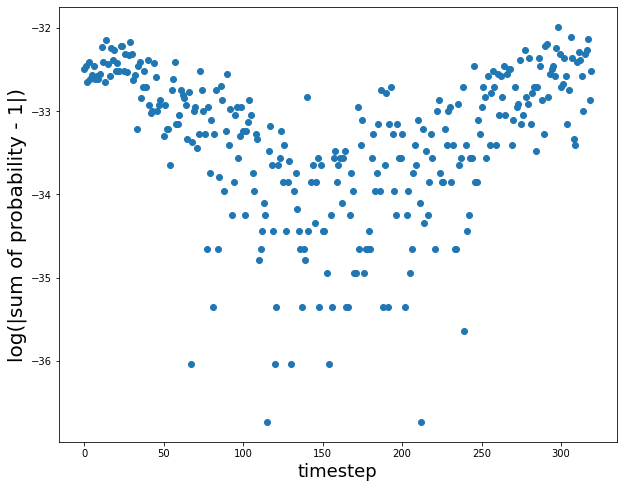

In [9]:
import matplotlib.pyplot as plt
import numpy as np

logAbsData = np.log(abs(df[0]))

fig = plt.figure(figsize=(10, 8))
plt.xlabel('timestep', fontsize=18)
plt.ylabel('log(|sum of probability - 1|)', fontsize=20)
#plt.yscale('log')
plt.plot(np.log(abs(df[0])), "o")
plt.savefig('Task7_1.pdf')
plt.show()

### With 

In [10]:
import pandas as pd
data = pd.read_csv("model3.csv", header=None)
data.style.set_properties(**{'background-color': 'pink',
                           'color': 'red'})

In [11]:

result = []

for i in range(len(data.iloc[:,0])):
    result.append(1-float(data.iloc[i,0].split("+0.000000")[0]))
df = pd.DataFrame(result)

In [12]:
df = df.drop(49)
df = df.drop(320)

/opt/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


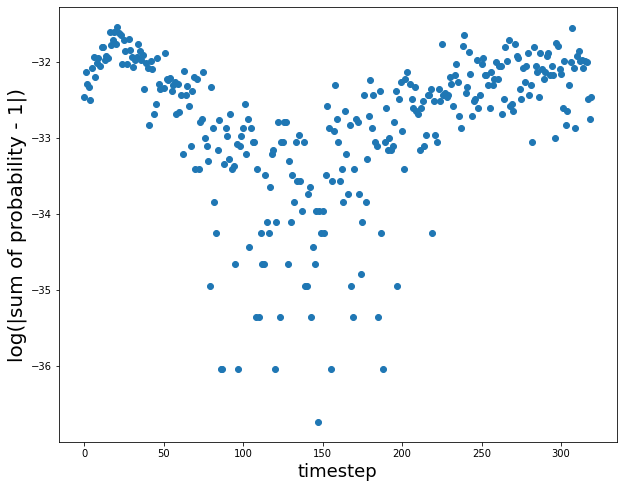

In [13]:
import matplotlib.pyplot as plt
import numpy as np

logAbsData = np.log(abs(df[0]))

fig = plt.figure(figsize=(10, 8))
plt.xlabel('timestep', fontsize=18)
plt.ylabel('log(|sum of probability - 1|)', fontsize=20)
#plt.yscale('log')
plt.plot(np.log(abs(df[0])), "o")
plt.savefig('Task7_2.pdf')
plt.show()

### Heat map

In [18]:
with open('matrix_trial.bin', mode='rb') as file: # b is important -> binary
    #print(file.read(198))
    fileContent = file.read()
fileContent
#print(file.read(4))

b'ARMA_CUB_BIN_FC016\n198 198 1\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [12]:
import numpy as np

np.load("matrix_trial.bin")


ValueError: Cannot load file containing pickled data when allow_pickle=False

In [ ]:
import struct
data = open("matrix_trial.bin", "rb").read()


In [19]:
pip install pyarma

     |████████████████████████████████| 12.7 MB 462 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyarma: filename=pyarma-0.500.0-cp39-cp39-macosx_13_0_arm64.whl size=6023666 sha256=f39709718d8dc4ffebb58b38cd316037815dae8f0908506992658b79d404ebcb
  Stored in directory: /Users/emilie/Library/Caches/pip/wheels/99/ad/39/48f3b4f6ff34ee752027319f373a089eaab25e424be7ce2897
Successfully built pyarma
Note: you may need to restart the kernel to use updated packages.


In [83]:
import pyarma as pa

A = pa.cx_cube()
A.load("matrix_trial.bin")

True

In [111]:
B = pa.real(A)
B.slice(0)
B

AttributeError: 'pyarma.pyarma.cube' object has no attribute 'slice'

In [112]:
k = pa.mat(198,198)
k = B.slice(0)

AttributeError: 'pyarma.pyarma.cube' object has no attribute 'slice'

In [119]:
B[:,:,0]

[cube size: 198x198x1]
[cube slice: 0]
   2.1777e-17   2.4692e-17   2.7961e-17   ...   2.4692e-17
   5.9189e-17   6.7112e-17   7.5999e-17   ...   6.7112e-17
   1.5763e-16   1.7873e-16   2.0239e-16   ...   1.7873e-16
            :            :            :   ...            :
  6.1760e-103  7.0028e-103  7.9300e-103   ...  7.0028e-103

In [108]:
k = np.zeros((10, 10))
k[1,1] = 2
#k = np.linalg.inv(k)
k

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [125]:
A[0]

(2.177680747943315e-17+0j)

In [129]:
B = pa.real(A)
k = np.zeros((198, 198))

column = 0
row = 0
for column in range(198):
    for row in range(198):
        k[column, row] = B[column,row,0]


In [130]:
k

array([[2.17768075e-017, 2.46917817e-017, 2.79612611e-017, ...,
        3.16233001e-017, 2.79612611e-017, 2.46917817e-017],
       [5.91894606e-017, 6.71123736e-017, 7.59988333e-017, ...,
        8.59522719e-017, 7.59988333e-017, 6.71123736e-017],
       [1.57627615e-016, 1.78727146e-016, 2.02392701e-016, ...,
        2.28899731e-016, 2.02392701e-016, 1.78727146e-016],
       ...,
       [2.43977270e-100, 2.76635291e-100, 3.13265025e-100, ...,
        3.54292815e-100, 3.13265025e-100, 2.76635291e-100],
       [1.24011255e-101, 1.40611007e-101, 1.59229542e-101, ...,
        1.80083566e-101, 1.59229542e-101, 1.40611007e-101],
       [6.17604699e-103, 7.00275300e-103, 7.92999903e-103, ...,
        8.96857759e-103, 7.92999903e-103, 7.00275300e-103]])

In [57]:
import pandas as pd

df = pd.DataFrame(A)
B= A[:,:,0]
B

[cube size: 198x198x1]
[cube slice: 0]
    (+2.178e-17,+0.000e+00)    (+2.469e-17,+0.000e+00)    (+2.796e-17,+0.000e+00)   ...    (+2.469e-17,+0.000e+00)
    (+5.919e-17,+0.000e+00)    (+6.711e-17,+0.000e+00)    (+7.600e-17,+0.000e+00)   ...    (+6.711e-17,+0.000e+00)
    (+1.576e-16,+0.000e+00)    (+1.787e-16,+0.000e+00)    (+2.024e-16,+0.000e+00)   ...    (+1.787e-16,+0.000e+00)
                          :                          :                          :   ...                          :
   (+6.176e-103,+0.000e+00)   (+7.003e-103,+0.000e+00)   (+7.930e-103,+0.000e+00)   ...   (+7.003e-103,+0.000e+00)

In [ ]:
trans(A)

In [79]:
pa.real(A)[:,:,0]

[cube size: 198x198x1]
[cube slice: 0]
   2.1777e-17   2.4692e-17   2.7961e-17   ...   2.4692e-17
   5.9189e-17   6.7112e-17   7.5999e-17   ...   6.7112e-17
   1.5763e-16   1.7873e-16   2.0239e-16   ...   1.7873e-16
            :            :            :   ...            :
  6.1760e-103  7.0028e-103  7.9300e-103   ...  7.0028e-103

In [80]:
A = pa.real(A)[:,:,0]

In [81]:
A

[cube size: 198x198x1]
[cube slice: 0]
   2.1777e-17   2.4692e-17   2.7961e-17   ...   2.4692e-17
   5.9189e-17   6.7112e-17   7.5999e-17   ...   6.7112e-17
   1.5763e-16   1.7873e-16   2.0239e-16   ...   1.7873e-16
            :            :            :   ...            :
  6.1760e-103  7.0028e-103  7.9300e-103   ...  7.0028e-103

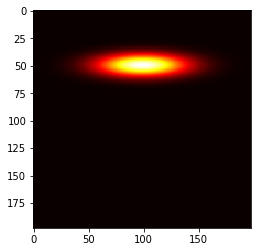

In [131]:
import matplotlib.pyplot as plt

plt.imshow(k, cmap='hot', interpolation='nearest')
plt.show()

In [121]:
plt.subplot(projection = A[:,:,0])
plt.show()

TypeError: projection must be a string, None or implement a _as_mpl_axes method, not <pyarma.pyarma.__subview_cx_cube object at 0x60000373c6e0>
[cube size: 198x198x1]
[cube slice: 0]
    (+2.178e-17,+0.000e+00)    (+2.469e-17,+0.000e+00)    (+2.796e-17,+0.000e+00)   ...    (+2.469e-17,+0.000e+00)
    (+5.919e-17,+0.000e+00)    (+6.711e-17,+0.000e+00)    (+7.600e-17,+0.000e+00)   ...    (+6.711e-17,+0.000e+00)
    (+1.576e-16,+0.000e+00)    (+1.787e-16,+0.000e+00)    (+2.024e-16,+0.000e+00)   ...    (+1.787e-16,+0.000e+00)
                          :                          :                          :   ...                          :
   (+6.176e-103,+0.000e+00)   (+7.003e-103,+0.000e+00)   (+7.930e-103,+0.000e+00)   ...   (+7.003e-103,+0.000e+00)


<Figure size 432x288 with 0 Axes>